In [1]:
using QuantumOptics
using PyPlot

In [2]:
basis = SpinBasis(1//2)
sz = sigmaz(basis)
sy = sigmay(basis)
sp = sigmap(basis)
sm = sigmam(basis)

Δ = 0.01;
Ω = 1;
ϕ = 0;
H0 = -(Δ/2)*sz
Hint = (Ω/(2*im))*(sp*exp(-im*ϕ)-sm*exp(im*ϕ))
Htot = H0 + Hint;

In [3]:
ψ0 = spindown(basis)
τπ = π; # define pi time
tspan = [0:0.1:τπ/2;] # pi pulse is tf = pi, 2pi pulse tf = 2pi
function RabiOsc(tspan,ψ0,H)
    tout, ψt = timeevolution.schroedinger(tspan,ψ0,H);
    return ψt
end

RabiOsc (generic function with 1 method)

In [4]:
psit = RabiOsc(tspan,ψ0,Htot)
expup = real(expect(sz, psit));

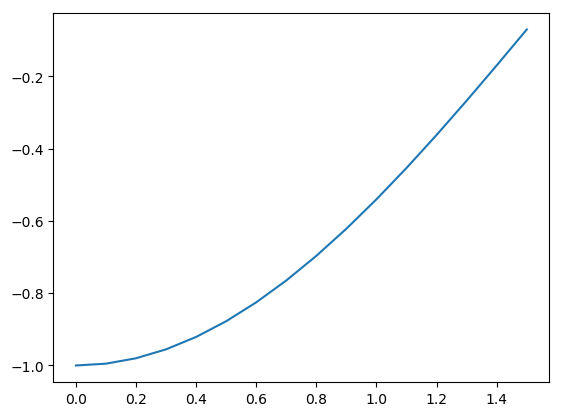

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000052E51C18>

In [5]:
plot(tspan,expup)

In [256]:
function unitaryop(t,H)
    U = exp(-im*dense(H)*t)
end

unitaryop (generic function with 1 method)

In [257]:
function RamseySequence(ψ0,H,T)
    
# first pi/2 pulse
    τπ = π; # define pi time
    t1 = [0:0.01:τπ/2;] # define pi/2-time time interval
    ψ1 = RabiOsc(t1,ψ0,H); # evolve function for time t1
    
    # Free Evolution
    t2 = t1.+T; # accumulated time
    H0 = -(Δ/2)*sz; # is this the light shift term?
    ψ2 = unitaryop(T,H0)*ψ1[end];
    
    # second pi/2 pulse
    t3 = [t2[end]:0.01:t2[end].+τπ/2;]
    ψ3 = RabiOsc(t3,ψ2,H);
    
    #tspan = [t1,t2,t3]
    return ψ3[end]
end

RamseySequence (generic function with 1 method)

In [258]:
ψtram = RamseySequence(ψ0,Htot,0);
abs(dagger(spindown(basis))*ψtram)^2

0.00010050519102177931

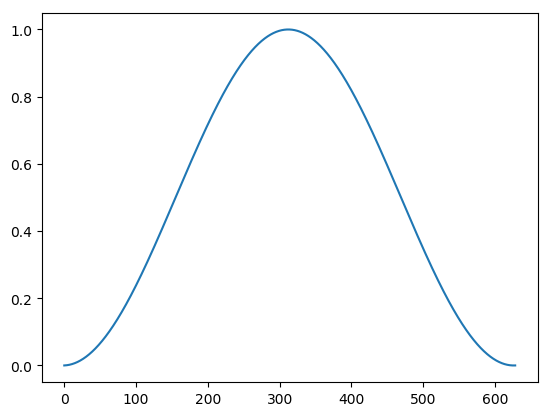

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000049E388D0>

In [259]:
T = [0:0.1:2*pi/Δ;]
Pram = Vector(undef,length(T));
for ii = 1:length(T);
    ψtram = RamseySequence(ψ0,Htot,T[ii]);
    Pram[ii] = abs(dagger(ψ0)*ψtram)^2;
end
plot(T,Pram)

In [226]:
function RamseySequenceEvol(ψ0,H,T)
    
# first pi/2 pulse
    τπ = π; # define pi time
    t1 = [0:0.01:τπ/2;] # define pi time time interval
    ψ1 = RabiOsc(t1,ψ0,H); # evolve function for time t1
    
    # Free Evolution
    t2 = t1.+T; # accumulated time
    H0 = -(Δ/2)*sz; # is this the light shift term?
    ψ2 = unitaryop(T,H0)*ψ1[end];
    
    # second pi/2 pulse
    t3 = [t2[end]:0.01:t2[end].+τπ/2;]
    ψ3 = RabiOsc(t3,ψ2,H);
    
    tspan = [t1;t2;t3]
    ψtot = [ψ1;ψ2;ψ3]
    return tspan, ψ3
end

RamseySequenceEvol (generic function with 1 method)